In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from nba_api.stats.endpoints import leaguedashplayerstats, leaguestandings

In [31]:
standings = leaguestandings.LeagueStandings(season='2022-23').get_data_frames()[0]
player_stats = leaguedashplayerstats.LeagueDashPlayerStats(season='2022-23', season_type_all_star='Regular Season', per_mode_detailed='PerGame').get_data_frames()[0]

In [32]:
# Aggregate player_stats data to get total points per game for each team
team_points = player_stats.groupby('TEAM_ID')['PTS'].sum().reset_index()
team_points

,TEAM_ID,PTS
0,1610612737,163.2
1,1610612738,154.7
2,1610612739,146.5
3,1610612740,168.1
4,1610612741,134.9
5,1610612742,173.0
6,1610612743,155.3
7,1610612744,163.4
8,1610612745,128.9
9,1610612746,187.1


In [33]:
# Merge standings data with the aggregated player_stats data
merged_data = pd.merge(standings, team_points, left_on='TeamID', right_on='TEAM_ID')
merged_data

,LeagueID,SeasonID,TeamID,TeamCity,TeamName,Conference,ConferenceRecord,PlayoffRank,ClinchIndicator,Division,...,Jul,Aug,Sep,Oct,Nov,Dec,PreAS,PostAS,TEAM_ID,PTS
0,00,22022,1610612743,Denver,Nuggets,West,34-18,1,- w,Northwest,...,None,None,None,4-3,10-4,9-5,41-18,12-11,1610612743,155.3
1,00,22022,1610612749,Milwaukee,Bucks,East,35-17,1,- e,Central,...,None,None,None,6-0,9-5,8-7,41-17,17-7,1610612749,171.9
2,00,22022,1610612738,Boston,Celtics,East,34-18,2,- a,Atlantic,...,None,None,None,4-2,14-2,8-6,42-17,15-8,1610612738,154.7
3,00,22022,1610612763,Memphis,Grizzlies,West,30-22,2,- sw,Southwest,...,None,None,None,4-3,8-6,10-4,35-22,16-9,1610612763,167.5
4,00,22022,1610612758,Sacramento,Kings,West,32-20,3,- p,Pacific,...,None,None,None,2-4,9-5,8-6,32-25,16-9,1610612758,141.5
5,00,22022,1610612755,Philadelphia,76ers,East,34-18,3,- x,Atlantic,...,None,None,None,4-4,8-6,9-4,38-19,16-9,1610612755,187.4
6,00,22022,1610612739,Cleveland,Cavaliers,East,34-18,4,- x,Central,...,None,None,None,5-1,9-7,9-6,38-23,13-8,1610612739,146.5
7,00,22022,1610612756,Phoenix,Suns,West,30-22,4,- x,Pacific,...,None,None,None,5-1,10-5,5-11,32-28,13-9,1610612756,172.8
8,00,22022,1610612752,New York,Knicks,East,32-20,5,- x,Atlantic,...,None,None,None,3-3,7-9,9-6,33-27,14-8,1610612752,156.1
9,00,22022,1610612746,LA,Clippers,West,27-25,5,- x,Pacific,...,None,None,None,3-4,10-6,8-7,33-28,11-10,1610612746,187.1


In [34]:
# Calculate win percentage for each team
merged_data['WinPercentage'] = merged_data['WINS'] / (merged_data['WINS'] + merged_data['LOSSES'])

In [36]:
print(merged_data[['TeamName', 'WinPercentage', 'PTS']])


         TeamName  WinPercentage    PTS
0         Nuggets       0.646341  155.3
1           Bucks       0.707317  171.9
2         Celtics       0.695122  154.7
3       Grizzlies       0.621951  167.5
4           Kings       0.585366  141.5
5           76ers       0.658537  187.4
6       Cavaliers       0.621951  146.5
7            Suns       0.548780  172.8
8          Knicks       0.573171  156.1
9        Clippers       0.536585  187.1
10       Warriors       0.536585  163.4
11           Nets       0.548780  169.5
12           Heat       0.536585  164.2
13         Lakers       0.524390  178.5
14          Hawks       0.500000  163.2
15   Timberwolves       0.512195  160.3
16       Pelicans       0.512195  168.1
17        Raptors       0.500000  161.6
18          Bulls       0.487805  134.9
19        Thunder       0.487805  155.3
20         Pacers       0.426829  167.1
21      Mavericks       0.463415  173.0
22           Jazz       0.451220  160.2
23        Wizards       0.426829  164.6


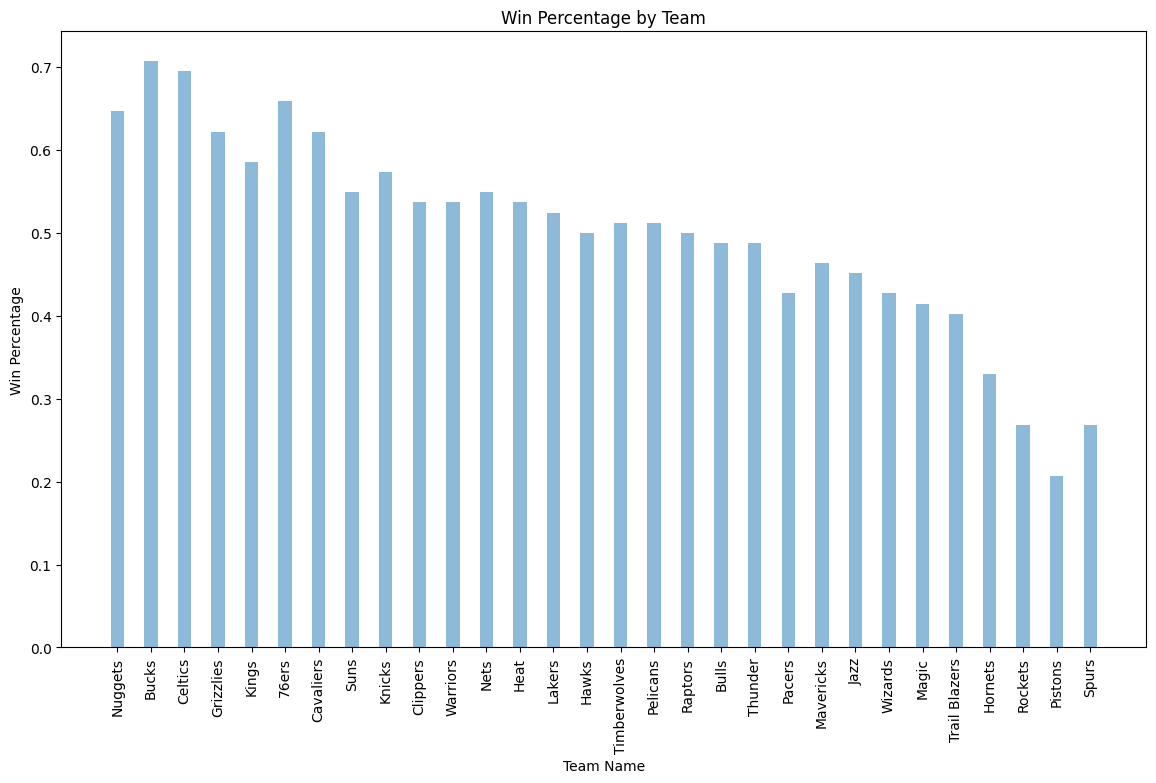

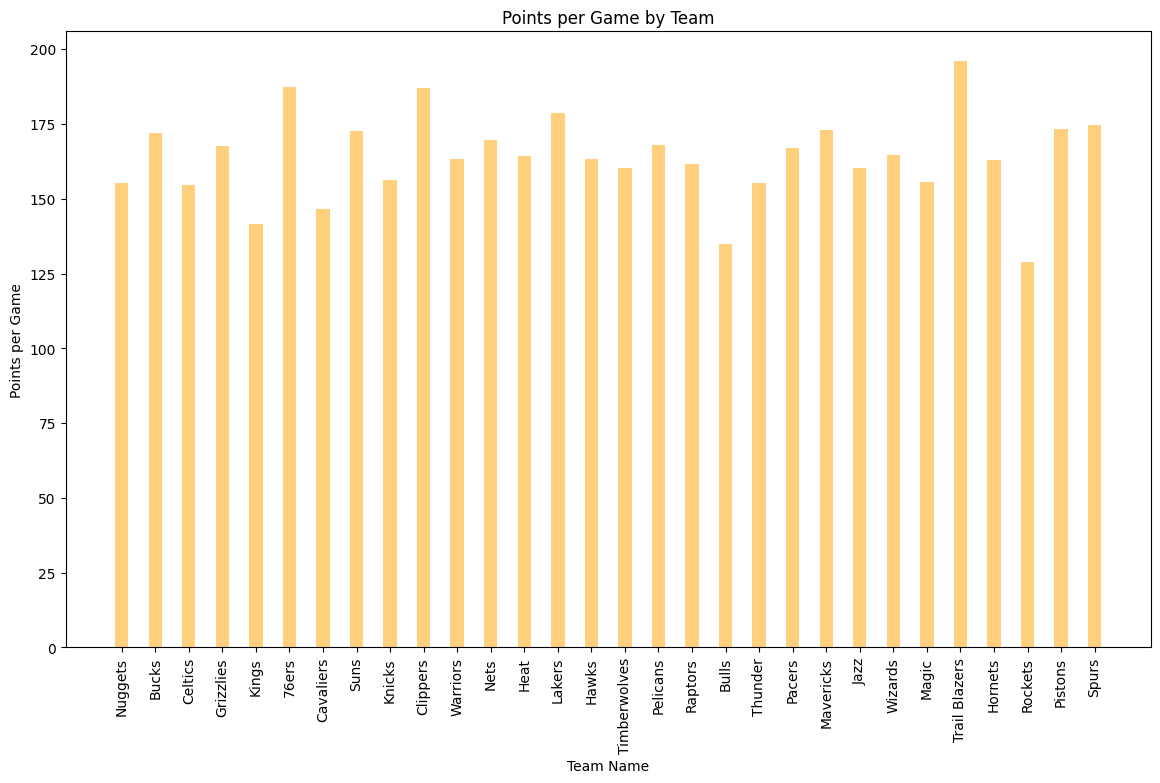

In [41]:
fig, ax1 = plt.subplots(figsize=(14, 8))

index = np.arange(len(merged_data['TeamName']))
bar_width = 0.4

ax1.bar(index, merged_data['WinPercentage'], bar_width, alpha=0.5, label='Win Percentage')
ax1.set_title('Win Percentage by Team')
ax1.set_xlabel('Team Name')
ax1.set_ylabel('Win Percentage')
ax1.set_xticks(index)
ax1.set_xticklabels(merged_data['TeamName'], rotation=90)

plt.show()

fig, ax2 = plt.subplots(figsize=(14, 8))

ax2.bar(index, merged_data['PTS'], bar_width, alpha=0.5, color='orange', label='Points per Game')
ax2.set_title('Points per Game by Team')
ax2.set_xlabel('Team Name')
ax2.set_ylabel('Points per Game')
ax2.set_xticks(index)
ax2.set_xticklabels(merged_data['TeamName'], rotation=90)

plt.show()


In [43]:
# Sort the data by win percentage in descending order
sorted_data = merged_data.sort_values(by='WinPercentage', ascending=False)

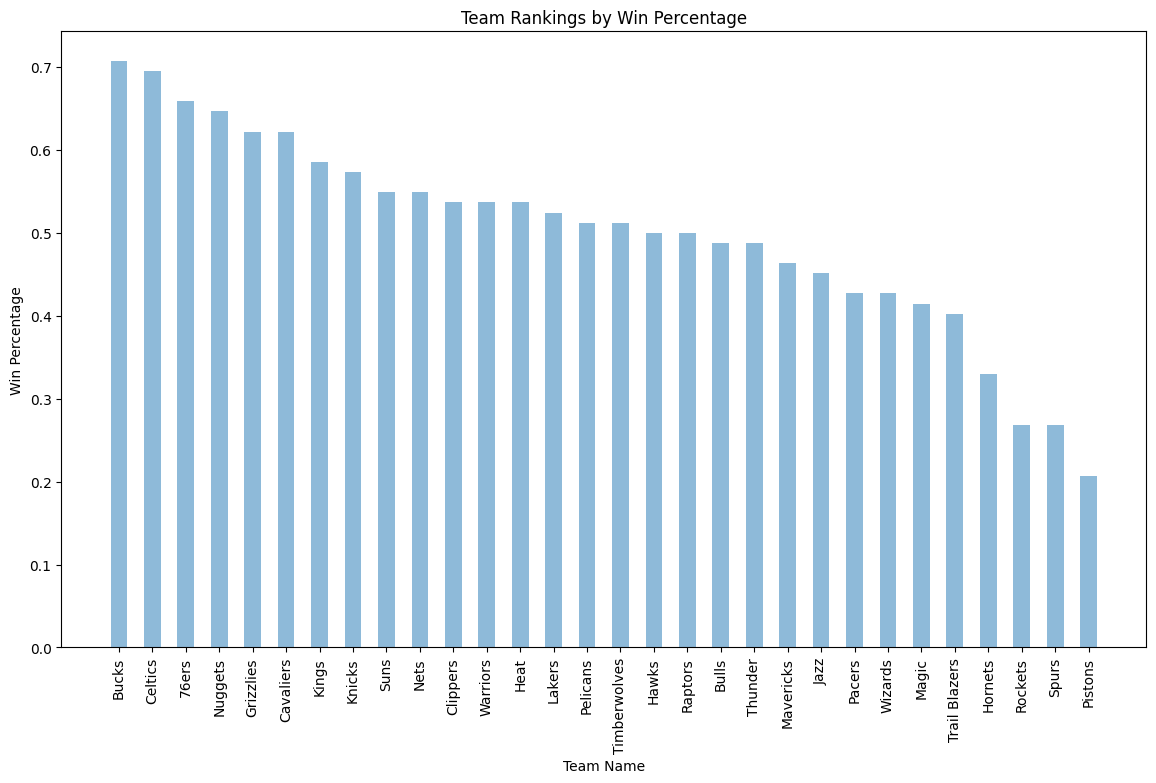

In [44]:
# Create a bar plot of the rankings
fig, ax = plt.subplots(figsize=(14, 8))

index = np.arange(len(sorted_data['TeamName']))
bar_width = 0.5

ax.bar(index, sorted_data['WinPercentage'], bar_width, alpha=0.5)
ax.set_title('Team Rankings by Win Percentage')
ax.set_xlabel('Team Name')
ax.set_ylabel('Win Percentage')
ax.set_xticks(index)
ax.set_xticklabels(sorted_data['TeamName'], rotation=90)

plt.show()


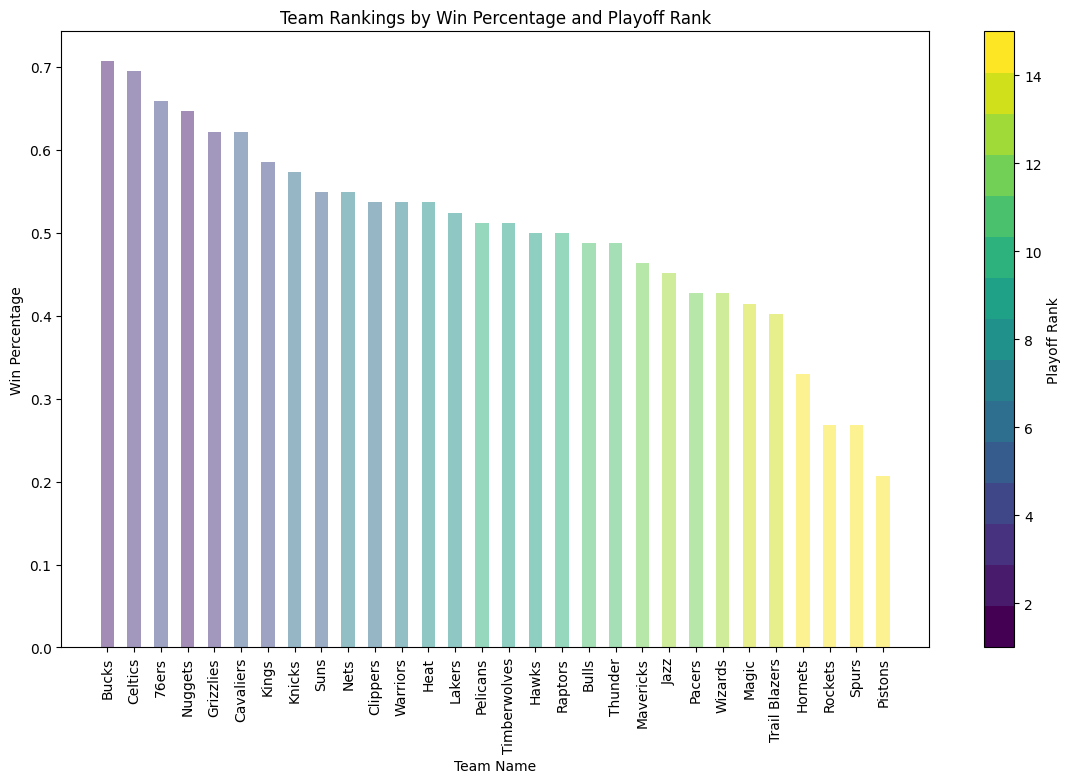

In [50]:
# Set up the plot
fig, ax = plt.subplots(figsize=(14, 8))

index = np.arange(len(sorted_data['TeamName']))
bar_width = 0.5

# Create a color map based on playoff rank
colors = cm.get_cmap('viridis', sorted_data['PlayoffRank'].max())(sorted_data['PlayoffRank'])

# Create the bar plot
ax.bar(index, sorted_data['WinPercentage'], bar_width, alpha=0.5, color=colors)
ax.set_title('Team Rankings by Win Percentage and Playoff Rank')
ax.set_xlabel('Team Name')
ax.set_ylabel('Win Percentage')
ax.set_xticks(index)
ax.set_xticklabels(sorted_data['TeamName'], rotation=90)

# Create a color bar to show the playoff rank
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cm.get_cmap('viridis', sorted_data['PlayoffRank'].max()),
                                        norm=matplotlib.colors.Normalize(vmin=1, vmax=sorted_data['PlayoffRank'].max()))
cbar.set_label('Playoff Rank')

plt.show()